In [ ]:
!pip install wn
!pip install nltk
!pip install scikit-learn
!pip install collections
!pip install beautifulsoup4
!pip install datasets

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from bs4 import BeautifulSoup
import string


In [ ]:
df = pd.read_csv("1.csv", error_bad_lines=False, engine='python', encoding='utf-8')

<ipython-input-3-0b384df4c293>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("1.csv", error_bad_lines=False, engine='python', encoding='utf-8')


In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

<Axes: >

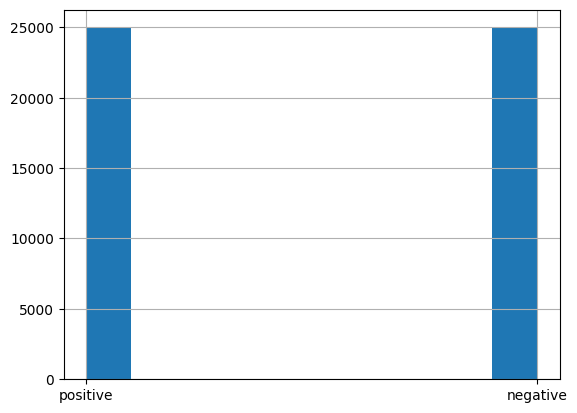

In [ ]:
df['sentiment'].hist()

# **Preprocessing Pipeline process**



In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.preprocessing import FunctionTransformer
import string
from bs4 import BeautifulSoup

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
tknzr = TweetTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
def remove_html_tags(text):
    return BeautifulSoup(text, 'html.parser').get_text()

In [ ]:
def remove_punctuation(text):
    no_punct = [words for words in text if words not in string.punctuation]
    words_wo_punct = ''.join(no_punct)
    words_wo_br = words_wo_punct.replace('br', '').replace('br', '')
    return words_wo_br

In [ ]:
def preprocess_text(text):
    text = remove_html_tags(text)
    text = remove_punctuation(text)
    text = text.lower()
    return text

In [ ]:
def remove_stopwords(text, stop_words):
    tokens = nltk.word_tokenize(text)
    cleaned_text = [word for word in tokens if word.lower() not in stop_words]
    return cleaned_text

In [ ]:
def tokenize_text(text, tokenizer):
    tokens = tokenizer.tokenize(text)
    return tokens

In [ ]:
def stem_tokens(tokens, stemmer):
    if isinstance(tokens, list):
        tokens = ' '.join(tokens)
    stemmed_words = [stemmer.stem(word) for word in tokens.split()]
    return stemmed_words

In [ ]:
def lemmatize_tokens(tokens):
    return [wnl.lemmatize(token) for token in tokens]

In [ ]:
def untokenize(tokens):
    return ' '.join(tokens)

In [ ]:
def extract_sentiment(df):
    binary_labels = df.apply(lambda x: 1 if str(x).lower() == 'positive' else 0)
    return binary_labels.values.reshape(-1, 1)

def preprocessing_pipeline(text):
    text = text.apply(remove_html_tags)
    text = text.apply(remove_punctuation)
    text = text.apply(preprocess_text)
    filtered_texts = text.apply(lambda x: remove_stopwords(x, stop_words))
    stemmed_tokens = filtered_texts.apply(stem_tokens, stemmer=ps)
    lemmatized_tokens = stemmed_tokens.apply(lemmatize_tokens)
    return lemmatized_tokens.apply(untokenize)


df['sentiment'] = extract_sentiment(df['sentiment'])
df['review'] = preprocessing_pipeline(df['review'])

X = df['review']
y = df['sentiment']
print(X)
print(y)

<ipython-input-14-6d6e64af61d2>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


0        one review mention watch 1 oz episod youll hoo...
1        wonder littl product film techniqu unassum old...
2        thought wonder way spend time hot summer weeke...
3        basic there famili littl boy jake think there ...
4        petter mattei love time money visual stun film...
                               ...                        
49995    thought movi right good job wasnt creativ orig...
49996    bad plot bad dialogu bad act idiot direct anno...
49997    cathol taught parochi elementari school nun ta...
49998    im go disagre previou comment side maltin one ...
49999    one expect star trek movi high art fan expect ...
Name: review, Length: 50000, dtype: object
0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


# **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
vectorizer = CountVectorizer(max_df=0.70, min_df=2, stop_words = "english")

In [ ]:
bow_vectorizer= vectorizer.fit_transform(X)
print(bow_vectorizer)

  (0, 41403)	1
  (0, 31362)	1
  (0, 54253)	3
  (0, 36616)	5
  (0, 16028)	2
  (0, 56305)	1
  (0, 23492)	1
  (0, 41578)	2
  (0, 16490)	1
  (0, 21954)	1
  (0, 31507)	1
  (0, 49752)	1
  (0, 47669)	2
  (0, 53063)	1
  (0, 52398)	1
  (0, 43009)	1
  (0, 53676)	4
  (0, 44169)	1
  (0, 55600)	1
  (0, 51476)	1
  (0, 17012)	1
  (0, 22381)	1
  (0, 50424)	1
  (0, 39711)	1
  (0, 39734)	1
  :	:
  (49999, 24620)	1
  (49999, 17123)	2
  (49999, 23769)	1
  (49999, 51434)	1
  (49999, 8893)	1
  (49999, 42846)	1
  (49999, 27370)	1
  (49999, 52412)	1
  (49999, 28306)	1
  (49999, 25092)	1
  (49999, 4353)	1
  (49999, 22046)	1
  (49999, 41119)	1
  (49999, 24488)	1
  (49999, 3804)	1
  (49999, 51222)	1
  (49999, 27213)	1
  (49999, 46610)	1
  (49999, 30925)	1
  (49999, 11563)	1
  (49999, 7889)	1
  (49999, 33230)	1
  (49999, 8934)	1
  (49999, 20703)	1
  (49999, 41124)	1


Train the model use XGboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow_vectorizer, y, random_state=42, test_size=0.2)

model = XGBClassifier(max_depth=6,
                      n_estimators=2000,
                      learning_rate=0.1,
                      objective='binary:logistic',
                      eval_metric='logloss')

model.fit(xtrain_bow, ytrain)

predictions = model.predict(xvalid_bow)

In [ ]:
input_data = ['honestly this is bad movie']
input_vectorized = vectorizer.transform(input_data)
input_predictions = model.predict(input_vectorized)
print(input_predictions)

[0]


Accuracy:  0.8827
Precision:  0.8770971517752634
Recall:  0.8922405239134749
F1 Score:  0.8846040334481062


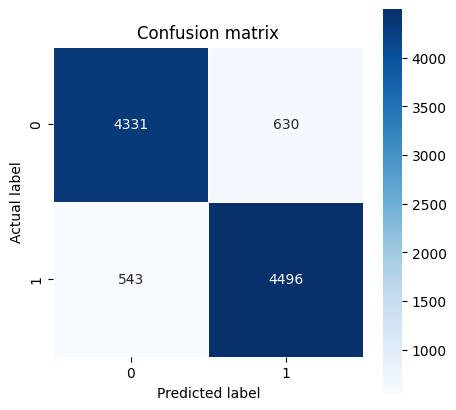

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

accuracy = accuracy_score(yvalid, predictions)
precision = precision_score(yvalid, predictions, average='binary')
recall = recall_score(yvalid, predictions, average='binary')
f1 = f1_score(yvalid, predictions, average='binary')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

cm = confusion_matrix(yvalid, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()

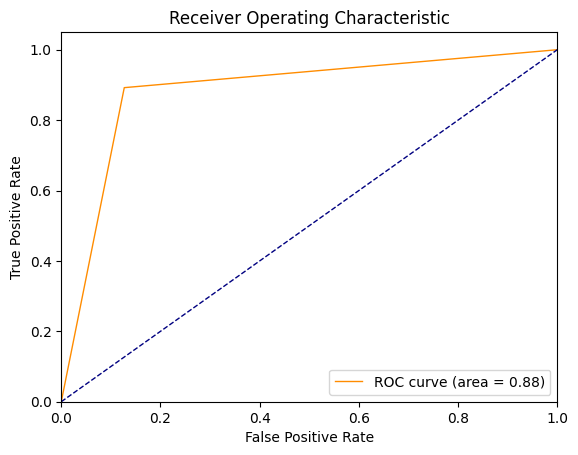

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(yvalid, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

**Testing model with custom input**


In [ ]:
input_data = ["I saw this film at school and absolutely loved it. Based on a true story, this is an absolutely splendid masterpiece of a film. Seriously, I couldn't find anything wrong with it. One definite plus is how it was filmed. Set in Morrocco in 1904, the Wind and the Lion is filled with stirring images like the Great Raisuli on horseback especially. The cinematography was faultless, the editing was crisp, the costumes were gorgeous and the scenery was breathtaking. And I have to mention the music from Jerry Goldsmith, it was phenomenal. I have used this phrase a lot recently, but Goldsmith ain't my favourite film composer for nothing. His score here is so rousing and exciting, it shows the man's true musical genius, and this gem of a score should be up there with Goldsmith's best scores with Legend, Rambo:First Blood, Patton and The Secret of NIMH.<br /><br />The action is exhilarating and the screenplay is intelligent and sophisticated. The direction is sensitively handled too. The performances were astounding as well, with Sean Connery, ever the picture of charisma and suavity, magnificent as the Great Raisuli, he almost dominates the entire picture on his own. He is joined by a feisty Candice Bergen, a wily John Huston and a captivating Brian Keith in one of his more understated performances. The history is fairly accurate, perhaps flimsy in some areas, but with the acting, music and visuals so good I am past caring. 10/10 Bethany Cox    ","it's amazing ..."]
df = pd.DataFrame(input_data, columns=['text'])

df['text'] = preprocessing_pipeline(df['text'])

input_vectorized = vectorizer.transform(df['text'])
input_predictions = model.predict(input_vectorized)
probabilities = model.predict_proba(input_vectorized)

print(probabilities)
print(input_predictions)


                                                text
0  saw film school absolut love base true stori a...
1                                               amaz
[[7.8725815e-04 9.9921274e-01]
 [1.9924045e-01 8.0075955e-01]]
[1 1]


In [ ]:
df

,text
0,although film ’ stellar cast deliv commend per...
1,amaz idiot time


In [ ]:
input_vectorized = vectorizer.transform(df['text'])
input_predictions = model.predict(input_vectorized)
probabilities = model.predict_proba(input_vectorized)

print(probabilities)
print(input_predictions)

[[0.39121228 0.6087877 ]
 [0.34373277 0.6562672 ]]
[1 1]


**Testing model with different dataset and count the accurracy**



In [ ]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

In [ ]:
df_test = pd.DataFrame(dataset["train"])

In [ ]:
df_test

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
8525,any enjoyment will be hinge from a personal th...,0
8526,if legendary shlockmeister ed wood had ever ma...,0
8527,hardly a nuanced portrait of a young woman's b...,0
8528,"interminably bleak , to say nothing of boring .",0


In [ ]:
df_test['text'] = preprocessing_pipeline(df_test['text'])
input_vectorized = vectorizer.transform(df_test['text'])

<ipython-input-14-6d6e64af61d2>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
print(df_test)

                                                   text  label
0     rock destin 21st centuri new conan he go make ...      1
1     gorgeous elabor continu lord ring trilog huge ...      1
2                                effect tootepid biopic      1
3      sometim like go movi fun wasabi good place start      1
4     emerg someth rare issu movi that honest keenli...      1
...                                                 ...    ...
8525  enjoy hing person threshold watch sad endear c...      0
8526  legendari shlockmeist ed wood ever made movi v...      0
8527  hardli nuanc portrait young woman eakdown film...      0
8528                       intermin bleak say noth bore      0
8529  thing realli get weird though particularli sca...      0

[8530 rows x 2 columns]


In [ ]:
filename = 'count_vectorizer.pkl'
pickle.dump(vectorizer, open(filename, 'wb'))


In [ ]:
X_test = input_vectorized
y_test = df_test['label']

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.6663540445486518
